# Programowanie w języku Julia
## Laboratorium 4

#### 1. Napisać program rozwiązujący równania różniczkowe modelu Lotka-Volterra. (6 pkt):

- Należy skorzystać z metod rozwiązywania równań różniczkowych zwyczajnych (ODE) oraz algorytmu Rungego-Kutty (RK4).
- Program powinien umożliwiać uruchamianie dla różnych parametrów (a, b,c, d, warunki początkowe)
- Wynik programu powinien być zapisywany do pliku CSV.
- Przykład pliku wyjściowego:
```
    t, x, y, experiment
    0.0, 8.0, 4.0, exp1
    0.01, 7.794658491266778, 4.200806038699347, exp1
    0.02, 7.579314194908448, 4.4024190488284916, exp1
    0.03, 7.355084374135755, 4.603574534941281, exp1
    0.04, 7.123200666740109, 4.802950130262052, exp1
    0.05, 6.884987187517405, 4.999190420559182, exp1
```
    gdzie exp1 to identyfikator eksperymentu.


In [19]:
Pkg.status("DifferentialEquations")
Pkg.status("DataFrames")

 - DifferentialEquations         4.5.0
 - DataFrames                    0.10.1


In [20]:
using DifferentialEquations
using Gadfly
using DataFrames

In [21]:
function LotkaVolterra(du, u, p, t)
    du[1] = p[1] * u[1] - p[2] * u[1] * u[2]
    du[2] = -p[3] * u[2] + p[4] * u[1] * u[2]
end

LotkaVolterra (generic function with 1 method)

In [22]:
function solveLV(a, b, c, d, ux, uy, id)
    timespan = (0.0, 100.0)
    u0 = [ux, uy]
    p = [a, b, c, d]
    
    problem = ODEProblem(LotkaVolterra, u0, timespan, p)
    solution = solve(problem, RK4(), dt = 0.01)

    dataframe = DataFrame(time = solution.t, 
        prey = map(x -> x[1], solution.u), 
        pred = map(x -> x[2], solution.u), 
        experiment = "exp$(id)")
    
    file = "results$(id).csv"
    header = isfile(file) ? false : true

    open(file, "a+") do stream
        printtable(stream, dataframe, header = header)
    end
end

solveLV (generic function with 1 method)

In [23]:
solveLV(0.55, 0.028, 0.8, 0.024, 50.0, 50.0, 1)

#### 2. Wykonać serię eksperymentów dla różnych parametrów modelu L-V i wykonać analizę danych (6 pkt):

- Należy wykonać co najmniej 4 eksperymenty dla różnych kombinacji parametrów.
- Dane z wszystkich eksperymentów (pochodzące z osobnych plików CSV) należy umieścić w jednej tabeli (DataFrame).
- Dla każdego eksperymentu wypisać minimalną, maksymalną oraz średnią liczbę drapieżników i ofiar.
- Wyliczyć różnicę między liczbą drapieżników i ofiar jako nową kolumnę.

In [24]:
param = zeros(4, 4)

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [25]:
function experiment_series(num = 4)
    res = DataFrame()
    for i = 1:num
        a = round(rand() / 10 + 0.5, 2)
        b = round(rand() / 100 + 0.03, 3)
        c = round(rand(), 1)
        d = round(rand() / 100 + 0.02, 3)
        param[i, :] = [a, b, c, d]
        #---------------------------------
        solveLV(a, b, c, d, 50.0, 50.0, i)
        #---------------------------------
        df = readtable("results$(i).csv")
        res = vcat(res, df)

        expdf = res[res[:experiment] .== "exp$(i)", :]
        pred = expdf[:pred]
        prey = expdf[:prey]

        toPrint = DataFrame()
        toPrint[:stat] = [:Minimum, :Maximum, :Average]
        toPrint[:pred] = [minimum(pred), maximum(pred), mean(pred)]
        toPrint[:prey] = [minimum(prey), maximum(prey), mean(prey)]

        print("Experiment $(i), parameters: $(param[i,:])\n")
        show(toPrint)
        print("\n\n")
    end

    res[:diff] = res[:pred] - res[:prey]

    return res
end

experiment_series (generic function with 2 methods)

In [26]:
res = experiment_series(4)

Experiment 1, parameters: [0.56, 0.031, 0.7, 0.023]
3×3 DataFrames.DataFrame
│ Row │ stat    │ pred    │ prey       │
├─────┼─────────┼─────────┼────────────┤
│ 1   │ Minimum │ 1.3064  │ 6.62729e-7 │
│ 2   │ Maximum │ 84.9469 │ 104.977    │
│ 3   │ Average │ 31.5715 │ 25.6313    │

Experiment 2, parameters: [0.52, 0.034, 0.9, 0.03]
3×3 DataFrames.DataFrame
│ Row │ stat    │ pred     │ prey       │
├─────┼─────────┼──────────┼────────────┤
│ 1   │ Minimum │ 0.683697 │ 2.95454e-9 │
│ 2   │ Maximum │ 93.3628  │ 118.488    │
│ 3   │ Average │ 35.8605  │ 23.8923    │

Experiment 3, parameters: [0.57, 0.035, 0.4, 0.027]
3×3 DataFrames.DataFrame
│ Row │ stat    │ pred    │ prey       │
├─────┼─────────┼─────────┼────────────┤
│ 1   │ Minimum │ 1.10111 │ 1.00098e-6 │
│ 2   │ Maximum │ 91.9585 │ 115.583    │
│ 3   │ Average │ 36.3408 │ 16.8029    │

Experiment 4, parameters: [0.5, 0.038, 0.6, 0.027]
3×3 DataFrames.DataFrame
│ Row │ stat    │ pred     │ prey       │
├─────┼─────────┼──────────┼─

3740×5 DataFrames.DataFrame
│ Row  │ time      │ prey    │ pred     │ experiment │ diff     │
├──────┼───────────┼─────────┼──────────┼────────────┼──────────┤
│ 1    │ 0.0       │ 50.0    │ 50.0     │ "exp1"     │ 0.0      │
│ 2    │ 0.01      │ 49.5754 │ 50.1978  │ "exp1"     │ 0.622419 │
│ 3    │ 0.0522894 │ 47.7912 │ 50.9859  │ "exp1"     │ 3.19478  │
│ 4    │ 0.117101  │ 45.1044 │ 52.0362  │ "exp1"     │ 6.93189  │
│ 5    │ 0.1971    │ 41.897  │ 53.0609  │ "exp1"     │ 11.1638  │
│ 6    │ 0.29809   │ 38.0686 │ 53.92    │ "exp1"     │ 15.8514  │
│ 7    │ 0.416778  │ 33.9411 │ 54.3264  │ "exp1"     │ 20.3853  │
│ 8    │ 0.555896  │ 29.6609 │ 54.04    │ "exp1"     │ 24.379   │
│ 9    │ 0.716542  │ 25.47   │ 52.8381  │ "exp1"     │ 27.3682  │
│ 10   │ 0.905234  │ 21.4966 │ 50.5146  │ "exp1"     │ 29.018   │
│ 11   │ 1.13543   │ 17.8224 │ 46.8141  │ "exp1"     │ 28.9917  │
⋮
│ 3729 │ 94.571    │ 1.68447 │ 14.569   │ "exp4"     │ 12.8846  │
│ 3730 │ 94.9297   │ 1.68324 │ 11.9402  │ "exp4"     │ 10.257   │
│ 3731 │ 95.328    │ 1.74664 │ 9.5769   │ "exp4"     │ 7.83027  │
│ 3732 │ 95.7738   │ 1.89036 │ 7.49087  │ "exp4"     │ 5.60051  │
│ 3733 │ 96.2623   │ 2.1361  │ 5.73776  │ "exp4"     │ 3.60166  │
│ 3734 │ 96.7774   │ 2.50552 │ 4.34976  │ "exp4"     │ 1.84424  │
│ 3735 │ 97.3185   │ 3.03814 │ 3.27325  │ "exp4"     │ 0.235106 │
│ 3736 │ 97.8802   │ 3.78622 │ 2.46024  │ "exp4"     │ -1.32598 │
│ 3737 │ 98.4619   │ 4.83028 │ 1.85612  │ "exp4"     │ -2.97416 │
│ 3738 │ 99.0622   │ 6.28401 │ 1.41598  │ "exp4"     │ -4.86803 │
│ 3739 │ 99.6806   │ 8.31315 │ 1.10274  │ "exp4"     │ -7.21041 │
│ 3740 │ 100.0     │ 9.63016 │ 0.983517 │ "exp4"     │ -8.64665 │

In [27]:
param

4×4 Array{Float64,2}:
 0.56  0.031  0.7  0.023
 0.52  0.034  0.9  0.03 
 0.57  0.035  0.4  0.027
 0.5   0.038  0.6  0.027

In [28]:
# inna metoda wyświetlenia statystyk dla poszczególnych kolumn DataFrame'a
describe(res[res[:experiment] .== "exp1", :])

time
Summary Stats:
Mean:           23.555907
Minimum:        0.000000
1st Quartile:   1.903767
Median:         7.204996
3rd Quartile:   42.125592
Maximum:        100.000000
Length:         1219
Type:           Float64
Number Missing: 0
% Missing:      0.000000

prey
Summary Stats:
Mean:           25.631303
Minimum:        0.000001
1st Quartile:   6.762469
Median:         15.848548
3rd Quartile:   42.392267
Maximum:        104.977268
Length:         1219
Type:           Float64
Number Missing: 0
% Missing:      0.000000

pred
Summary Stats:
Mean:           31.571545
Minimum:        1.306401
1st Quartile:   9.259646
Median:         30.057849
3rd Quartile:   51.272820
Maximum:        84.946916
Length:         1219
Type:           Float64
Number Missing: 0
% Missing:      0.000000

experiment
Summary Stats:
Length:         1219
Type:           String
Number Unique:  1
Number Missing: 0
% Missing:      0.000000

diff
Summary Stats:
Mean:           5.940242
Minimum:        -94.138018
1st Qu

#### 3. Narysować wykresy (8 pkt):
- Grupę wykresów po jednym dla każdego eksperymentu, pokazujące zależności czasowe dla wszystkich kolumn danych (korzystając z Geom.subplot_grid).
- Złożony wykres przestrzeni fazowej z nałożonymi seriami z wszystkich eksperymentów przykład.
- Na każdym wykresie należy umieścić podpisy osi oraz legendy, zawierające parametry eksperymentów.

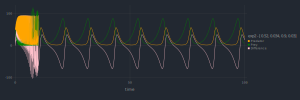

In [92]:
set_default_plot_size(30cm, 10cm)

plot(res[res[:experiment] .== "exp2", :], Coord.Cartesian(ymax=120),
    layer(x = "time", y = "pred", Geom.line, Theme(default_color=colorant"orange")),
    layer(x = "time", y = "prey", Geom.line, Theme(default_color=colorant"green")), 
    layer(x = "time", y = "diff", Geom.line, Theme(default_color=colorant"pink")),
    Guide.manual_color_key(
        "exp2 - $(param[2, :])", 
        ["Predator", "Prey", "Difference"], 
        ["orange", "green", "pink"]),
    Guide.ylabel(nothing), 
    Guide.xlabel("time")
)

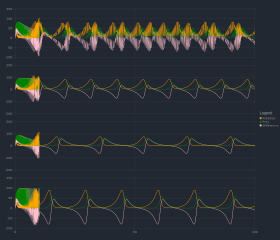

In [101]:
set_default_plot_size(28cm, 24cm)
plot(res, Geom.subplot_grid(
        layer(ygroup="experiment", x="time", y="prey", Geom.line, Theme(default_color=colorant"orange")),
        layer(ygroup="experiment", x="time", y="pred", Geom.line, Theme(default_color=colorant"green")), 
        layer(ygroup="experiment", x="time", y="diff", Geom.line, Theme(default_color=colorant"pink")),
        free_y_axis=true
    ),
    Guide.manual_color_key(
        "Legend",
        ["Predator", "Prey", "Difference"], 
        ["orange", "green", "pink"])
)

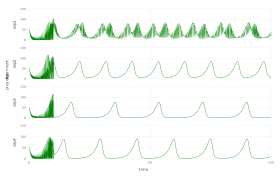

In [103]:
set_default_plot_size(28cm, 18cm)
plot(res, ygroup="experiment", x="time", y="prey", 
    Geom.subplot_grid(Geom.line, free_y_axis=true), Theme(default_color=colorant"green"))

In [83]:
function drawPhase(res)
    layers = Vector{Gadfly.Layer}()
    colors = [colorant"magenta", colorant"green", colorant"yellow", colorant"blue", colorant"black"]
    exps = unique(res[:experiment])
    
    for i in 1:length(exps)
        exp_i = res[res[:experiment] .== exps[i], :]
        usedColor = color(colors[i % length(colors)])
        push!(layers, layer(exp_i, x  = "prey", y = "pred", Geom.point, Theme(default_color = usedColor))...)
    end
    
    set_default_plot_size(24cm, 16cm)
    plot(layers, 
        Guide.XLabel("Prey"), 
        Guide.YLabel("Predator"), 
        Guide.Title("Population"), 
        Guide.manual_color_key(
            "Parameters", 
            ["exp1 - $(param[1,:])", "exp2 - $(param[2,:])", 
                "exp3 - $(param[3,:])", "exp4 - $(param[4,:])"],
            ["magenta", "green", "yellow", "blue"])
    )
end

drawPhase (generic function with 1 method)

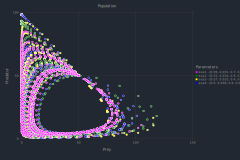

In [84]:
drawPhase(res)

#### Ludwik Ciechański